In [1]:
import requests
import mongodb
import pandas as pd
import json
from bson import ObjectId
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as distance
import pymongo

In [3]:
url = 'https://ihproject.herokuapp.com/'
requests.get(url)

<Response [503]>

In [2]:
# from platform import python_version
# print(python_version())

3.7.3


In [3]:
# import sys
# print(sys.executable)
# print(sys.version)
# print(sys.version_info)

/Applications/Xcode.app/Contents/Developer/usr/bin/python3
3.7.3 (default, Oct 11 2019, 19:39:43) 
[Clang 11.0.0 (clang-1100.0.33.12)]
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [3]:

db, users = mongodb.connectCollection('API_Project','users')
db, chats = mongodb.connectCollection('API_Project','chats')
db, messages = mongodb.connectCollection('API_Project','messages')

In [5]:
list(users.find({}))

[{'_id': ObjectId('5de4f3b8b22b855ddb7745cc'), 'name': 'John Wick'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745cd'), 'name': 'Mike Wazowski'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745ce'), 'name': 'Leia Organa'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745cf'), 'name': 'Tony Stark'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745d0'), 'name': 'Ellen Ripley'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745d1'), 'name': 'J. Jonah Jameson'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745d2'),
  'name': 'Danny Torrances Finger'},
 {'_id': ObjectId('5de4f3b9b22b855ddb7745d3'), 'name': 'Danny Torrance'}]

In [ ]:
with open('my-application/input/chats.json') as f:
       chats_json = json.load(f)
coll.insert_many(chats_json)

In [2]:
data = requests.get('http://localhost:8080/')
data.text

'Welcome to my API! :) '

In [2]:
url = 'http://localhost:8080/user/5de280d633ba2628285db85b/recommend'
requests.get(url).text

'Leia Organa (5de280d633ba2628285db85b) friend recommedation -----> Tony Stark (5de280d633ba2628285db85c)'

In [2]:
url = 'http://localhost:8080/chat/5de296ee1821b6e70cb16f80/sentiment'
requests.get(url).json()

{'Hey Mike, whats up??': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Dude!!! 😀️ Did you watch the game last night?': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'No, had to work. How was it?': {'neg': 0.268,
  'neu': 0.732,
  'pos': 0.0,
  'compound': -0.296},
 'Awesome! Boyander scored 3 goals!': {'neg': 0.0,
  'neu': 0.39,
  'pos': 0.61,
  'compound': 0.6892},
 'No way! 😮️': {'neg': 0.555, 'neu': 0.445, 'pos': 0.0, 'compound': -0.3595},
 'Way...': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'I bet people went crazy': {'neg': 0.444,
  'neu': 0.556,
  'pos': 0.0,
  'compound': -0.34},
 'For sure. We stayed at KuboLoco until 6AM.': {'neg': 0.0,
  'neu': 0.753,
  'pos': 0.247,
  'compound': 0.3182},
 'Motherfucker! Hungover? 😵️': {'neg': 0.71,
  'neu': 0.29,
  'pos': 0.0,
  'compound': -0.7088},
 'Dead, burried and still suffering! 🤮️': {'neg': 0.658,
  'neu': 0.342,
  'pos': 0.0,
  'compound': -0.8268}}

## add Original Conversation Dataset

In [3]:
with open ('../input/chats.json') as json_file:
    data = json.load(json_file)

In [4]:
# Creating users list:
u = []
for e in data:
    if e['userName'] not in u:
        u.append(e['userName'])
u

['John Wick',
 'Mike Wazowski',
 'Leia Organa',
 'Tony Stark',
 'Ellen Ripley',
 'J. Jonah Jameson',
 'Danny Torrances Finger',
 'Danny Torrance']

In [5]:
mongodb.createMultipleUsers(u)

John Wick {"inserted_doc": "5de4f3b8b22b855ddb7745cc"}
Mike Wazowski {"inserted_doc": "5de4f3b9b22b855ddb7745cd"}
Leia Organa {"inserted_doc": "5de4f3b9b22b855ddb7745ce"}
Tony Stark {"inserted_doc": "5de4f3b9b22b855ddb7745cf"}
Ellen Ripley {"inserted_doc": "5de4f3b9b22b855ddb7745d0"}
J. Jonah Jameson {"inserted_doc": "5de4f3b9b22b855ddb7745d1"}
Danny Torrances Finger {"inserted_doc": "5de4f3b9b22b855ddb7745d2"}
Danny Torrance {"inserted_doc": "5de4f3b9b22b855ddb7745d3"}


In [6]:
mongodb.createMultipleChats(5)

1 {"inserted_doc": "5de4f3beb22b855ddb7745d4"}
2 {"inserted_doc": "5de4f3beb22b855ddb7745d5"}
3 {"inserted_doc": "5de4f3beb22b855ddb7745d6"}
4 {"inserted_doc": "5de4f3beb22b855ddb7745d7"}
5 {"inserted_doc": "5de4f3bfb22b855ddb7745d8"}


In [7]:
df = pd.DataFrame(data)

In [11]:
# Create base_member json that is the input of mongodb.addMultipleMembers(base_members), to add multiple 
# to a chat
df['userId'] = df.userName.apply(lambda x: list(users.find({'name':x}))[0]['_id'])
df['chatId'] = df.idChat.apply(lambda x: list(chats.find({}))[x]['_id'])
e = df[['chatId', 'userId']].groupby(['chatId','userId']).count().reset_index()
h = e.groupby('chatId').userId.apply(list).reset_index()
base_members = h.to_dict(orient='records')
base_members

[{'chatId': ObjectId('5de4f3beb22b855ddb7745d4'),
  'userId': [ObjectId('5de4f3b8b22b855ddb7745cc'),
   ObjectId('5de4f3b9b22b855ddb7745cd')]},
 {'chatId': ObjectId('5de4f3beb22b855ddb7745d5'),
  'userId': [ObjectId('5de4f3b9b22b855ddb7745ce'),
   ObjectId('5de4f3b9b22b855ddb7745cf')]},
 {'chatId': ObjectId('5de4f3beb22b855ddb7745d6'),
  'userId': [ObjectId('5de4f3b9b22b855ddb7745cd'),
   ObjectId('5de4f3b9b22b855ddb7745d0')]},
 {'chatId': ObjectId('5de4f3beb22b855ddb7745d7'),
  'userId': [ObjectId('5de4f3b8b22b855ddb7745cc'),
   ObjectId('5de4f3b9b22b855ddb7745d1')]},
 {'chatId': ObjectId('5de4f3bfb22b855ddb7745d8'),
  'userId': [ObjectId('5de4f3b9b22b855ddb7745d2'),
   ObjectId('5de4f3b9b22b855ddb7745d3')]}]

In [12]:
mongodb.addMultipleMembers(base_members)

5de4f3b8b22b855ddb7745cc has been added to chat 5de4f3beb22b855ddb7745d4
5de4f3b9b22b855ddb7745cd has been added to chat 5de4f3beb22b855ddb7745d4
5de4f3b9b22b855ddb7745ce has been added to chat 5de4f3beb22b855ddb7745d5
5de4f3b9b22b855ddb7745cf has been added to chat 5de4f3beb22b855ddb7745d5
5de4f3b9b22b855ddb7745cd has been added to chat 5de4f3beb22b855ddb7745d6
5de4f3b9b22b855ddb7745d0 has been added to chat 5de4f3beb22b855ddb7745d6
5de4f3b8b22b855ddb7745cc has been added to chat 5de4f3beb22b855ddb7745d7
5de4f3b9b22b855ddb7745d1 has been added to chat 5de4f3beb22b855ddb7745d7
5de4f3b9b22b855ddb7745d2 has been added to chat 5de4f3bfb22b855ddb7745d8
5de4f3b9b22b855ddb7745d3 has been added to chat 5de4f3bfb22b855ddb7745d8


In [14]:
db = df.to_dict(orient='records')

In [16]:
mongodb.addMultipleMessages(db)

Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d4
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855ddb7745d5
Message has been added to chat 5de4f3beb22b855dd

## Sentiment 


In [13]:
from textblob import TextBlob 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sid = SentimentIntensityAnalyzer()

In [18]:
def getChatSentiment(chat, coll, coll_messages):
    sid = SentimentIntensityAnalyzer()
    m = coll_messages.find({'chat_id':chat})
    out = {}
    for message in m :
        sentence = message['markdown'].encode('latin-1').decode('utf-8')
        out[sentence] = sid.polarity_scores(sentence)
    return out

In [20]:
chat = '5de296ee1821b6e70cb16f80'
coll = chats
coll_messages = messages
out = getChatSentiment(chat, coll, coll_messages)

In [21]:
outDf = pd.DataFrame(out).T

In [25]:
def getChatPDF(out):
    outDf = pd.DataFrame(out).T
    
    mu = outDf.describe()['compound']['mean']
    sigma = outDf.describe()['compound']['std']
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    fig, ax = plt.subplots(figsize=(5,3.5), dpi= 80)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), color='grey',  lw=4, label='norm pdf')
    ax.set_title(f'Compound conversation \n Probability density function\n ', size=12, color ='black')
    ax.axvline(x=mu, color='grey', label=str(mu)[:5])
    ax.axvline(x=mu - 2*sigma, color='orange', linestyle = '--', label=str(stats.norm.cdf(mu-2*sigma,mu, sigma)*100)[:4])
    ax.axvline(x=mu + 2*sigma, color='green',  linestyle = '--',label=str(stats.norm.cdf(mu+2*sigma,mu, sigma)*100)[:4])
    ax.legend()
    ax.spines['top'].set_color('#a8a4a2')
    ax.spines['right'].set_color('#a8a4a2')
    ax.spines['bottom'].set_color('#a8a4a2')
    ax.spines['left'].set_color('#a8a4a2')

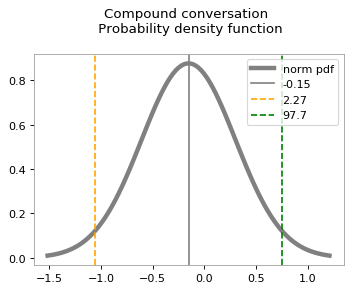

In [26]:
getChatPDF(out)

In [27]:
def getChatEvol(out):
    outDf = pd.DataFrame(out).T
    y = outDf['compound']
    x = range(len(y))
    
    fig, ax = plt.subplots(figsize=(7,4), dpi= 80)

    ax.plot(x,y, c='grey', marker = 'o', markersize = 3)
    ax.fill_between(x[1:], y[1:], 0, where=y[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
    ax.fill_between(x[1:], y[1:], 0, where=y[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title("Chat Compound Score Evolution\n", fontsize=12)
    ax.set_ylabel('compound score')
    ax.set_xlabel('messages')
    ax.grid(color='grey', linestyle='-', linewidth=0.4, alpha=0.5)
    ax.spines['bottom'].set_color('#a8a4a2')
    ax.spines['left'].set_color('#a8a4a2')


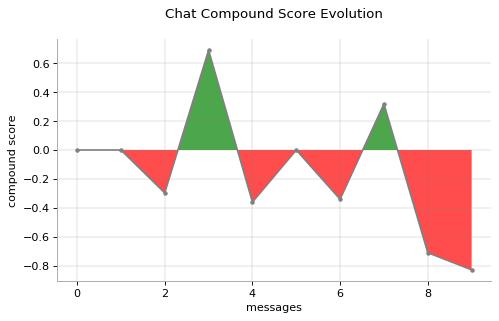

In [28]:
getChatEvol(out)

## Recommendation

In [ ]:
# message['markdown'].encode('latin-1').decode('utf-8')
# e['markdown'].encode('latin-1').decode('utf-8')

In [121]:
def getUserRecommendation(user_id, coll, users_coll):

    col = {}
    for e in list(users.find({})):
        col[str(e['_id'])]=e['name']
        
    col_re = {v: k for k, v in col.items()}
    
    docs = {}
    for e in list(messages.find({})):
        docs[e['author_id']]=''

    for e in list(messages.find({})):
        for i in docs.keys():
            if i == e['author_id']:
                docs[i]+=' '+(e['markdown'].encode('latin-1').decode('utf-8'))
    
    # Create the Document Term Matrix
    count_vectorizer = CountVectorizer(stop_words='english')
    sparse_matrix = count_vectorizer.fit_transform(docs.values())
    
    doc_term_matrix = sparse_matrix.todense()
    
    # Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
    df = pd.DataFrame(doc_term_matrix, 
                      columns=count_vectorizer.get_feature_names(), 
                      index=docs.keys())

    df.index = df.index.to_series().apply(lambda x: col[x])
    
    # Compute Cosine Similarity matrix (or selected distance)
    similarity_matrix = distance(df, df)
    
    sim_df = pd.DataFrame(similarity_matrix, columns=df.index, index=df.index)
    
    # Max similarities of related documents
    
    np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
    out = sim_df.idxmax()
    name = col[user_id]
    result = out[name]
    friend_id = col_re[result]
    return f'{name} ({user_id}) friend recommedation -----> {result} ({friend_id})'


In [122]:
getUserRecommendation(messages, users, '5de280d633ba2628285db85a')

'Mike Wazowski (5de280d633ba2628285db85a) friend recommedation -----> John Wick (5de280d633ba2628285db859)'

In [77]:
col = {}
for e in list(users.find({})):
    col[str(e['_id'])]=e['name']

In [120]:
col_re = {v: k for k, v in col.items()}
col_re

{'John Wick': '5de280d633ba2628285db859',
 'Mike Wazowski': '5de280d633ba2628285db85a',
 'Leia Organa': '5de280d633ba2628285db85b',
 'Tony Stark': '5de280d633ba2628285db85c',
 'Ellen Ripley': '5de280d633ba2628285db85d',
 'J. Jonah Jameson': '5de280d633ba2628285db85e',
 'Danny Torrances Finger': '5de280d633ba2628285db85f',
 'Danny Torrance': '5de280d633ba2628285db860'}

In [52]:
docs = {}
for e in list(messages.find({})):
    docs[e['author_id']]=''

for e in list(messages.find({})):
    for i in docs.keys():
        if i == e['author_id']:
            docs[i]+=' '+(e['markdown'].encode('latin-1').decode('utf-8'))

In [53]:
docs.values()

dict_values([' Hey Mike, whats up?? No, had to work. How was it? No way! 😮️ I bet people went crazy Motherfucker! Hungover? 😵️ Sure, boss. I do! I just dont feel appreciated in my job I dunno... Maybe Thank you, boss! I feel much better...', ' Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS', ' Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother.', ' I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way.

In [54]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
sparse_matrix = count_vectorizer.fit_transform(docs.values())
sparse_matrix

<8x152 sparse matrix of type '<class 'numpy.int64'>'
	with 176 stored elements in Compressed Sparse Row format>

In [87]:
# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=docs.keys())

df.index = df.index.to_series().apply(lambda x: col[x])

In [88]:
display(df)

,6am,aa,alcoholics,alien,angry,anonymous,appreciated,ass,awesome,ballsack,...,walk,want,watch,way,went,whats,work,www,youre,youve
John Wick,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
Mike Wazowski,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
Leia Organa,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Tony Stark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Ellen Ripley,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
J. Jonah Jameson,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,3
Danny Torrances Finger,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Danny Torrance,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.metrics.pairwise import cosine_similarity as distance
#from sklearn.metrics.pairwise import euclidean_distances as distance

# Compute Cosine Similarity matrix (or selected distance)
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.09078413 0.08451543 0.16903085 0.         0.
  0.         0.03857584]
 [0.09078413 1.         0.03580574 0.07161149 0.02875987 0.
  0.         0.06537205]
 [0.08451543 0.03580574 1.         0.15       0.08032193 0.
  0.         0.        ]
 [0.16903085 0.07161149 0.15       1.         0.08032193 0.
  0.         0.        ]
 [0.         0.02875987 0.08032193 0.08032193 1.         0.16433731
  0.         0.03666178]
 [0.         0.         0.         0.         0.16433731 1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.10998534]
 [0.03857584 0.06537205 0.         0.         0.03666178 0.
  0.10998534 1.        ]]


,John Wick,Mike Wazowski,Leia Organa,Tony Stark,Ellen Ripley,J. Jonah Jameson,Danny Torrances Finger,Danny Torrance
John Wick,1.000000,0.090784,0.084515,0.169031,0.000000,0.000000,0.000000,0.038576
Mike Wazowski,0.090784,1.000000,0.035806,0.071611,0.028760,0.000000,0.000000,0.065372
Leia Organa,0.084515,0.035806,1.000000,0.150000,0.080322,0.000000,0.000000,0.000000
Tony Stark,0.169031,0.071611,0.150000,1.000000,0.080322,0.000000,0.000000,0.000000
Ellen Ripley,0.000000,0.028760,0.080322,0.080322,1.000000,0.164337,0.000000,0.036662
J. Jonah Jameson,0.000000,0.000000,0.000000,0.000000,0.164337,1.000000,0.000000,0.000000
Danny Torrances Finger,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.109985
Danny Torrance,0.038576,0.065372,0.000000,0.000000,0.036662,0.000000,0.109985,1.000000


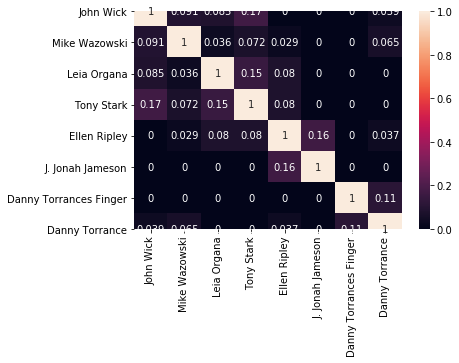

In [92]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=df.index, index=df.index)
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [101]:
# Max similarities of related documents
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
a = sim_df.idxmax()
a

John Wick                             Tony Stark
Mike Wazowski                          John Wick
Leia Organa                           Tony Stark
Tony Stark                             John Wick
Ellen Ripley                    J. Jonah Jameson
J. Jonah Jameson                    Ellen Ripley
Danny Torrances Finger            Danny Torrance
Danny Torrance            Danny Torrances Finger
dtype: object

In [109]:
a['John Wick']

'Tony Stark'

In [1]:
url = 'https://app-sentiment-recommendation.herokuapp.com/user/5de4f3b8b22b855ddb7745cc/recommend'
requests.get(url).text


NameError: name 'requests' is not defined

In [1]:
import requests
url = 'http://localhost:8080/prueba'
data = {
    'prueba':'5de7ea0a515a7307767d836d',
    'hola': '5de4f3b9b22b855ddb7745cd'}
requests.post(url, params=data).text



'\n    <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n    <html>\n        <head>\n            <title>Error: 404 Not Found</title>\n            <style type="text/css">\n              html {background-color: #eee; font-family: sans;}\n              body {background-color: #fff; border: 1px solid #ddd;\n                    padding: 15px; margin: 15px;}\n              pre {background-color: #eee; border: 1px solid #ddd; padding: 5px;}\n            </style>\n        </head>\n        <body>\n            <h1>Error: 404 Not Found</h1>\n            <p>Sorry, the requested URL <tt>&#039;http://localhost:8080/prueba?prueba=5de7ea0a515a7307767d836d&amp;hola=5de4f3b9b22b855ddb7745cd&#039;</tt>\n               caused an error:</p>\n            <pre>Not found: &#039;/prueba&#039;</pre>\n        </body>\n    </html>\n'